In [74]:
import os
import spacy
import pandas as pd
import matplotlib.pyplot as plt
from spacytextblob.spacytextblob import SpacyTextBlob

In [75]:
nlp = spacy.load('en_core_web_sm')

In [76]:
#Change path accordingly. If this notebook is seen in the context of Ross' repo, this would match the data-folder path. 
news_data_path = os.path.join('..', 'data', 'abcnews-date-text.csv')
news_data = pd.read_csv(news_data_path)

In [77]:
#Selecting the two columns we want to work with
dates = news_data['publish_date']
headlines = news_data['headline_text']

In [78]:
#nlp.add_pipe(SpacyTextBlob())

#list for the calculated polarities
polarities = []

#calculating polarities for each "sentence" or row/headline in the dataset
#The counter and if-sentence makes it possible to atleast follow some amount of progress when this
#chunk runs since it can take a while.
counter=0
for doc in nlp.pipe(headlines, batch_size=1000):
    for sentence in doc.sents:
        score = sentence._.sentiment.polarity
        polarities.append(score)
        counter+=1
    if counter % 100000 == 0:
        print(counter)

100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000


In [83]:
#I realized that all the operations needed for grouping by the dates calculated a mean-value for each date
#can be done solely in pandas. This was not my initial approach.

#zip matches values in lists in order into tuples: ((date, score), (date, score), (date, score))
df = pd.DataFrame(zip(dates, polarities), columns = ('date', 'score'))

#pandas groupby can collapse multiple rows containing the same value in a cell.
#In this case thats the headlines that were published on the same date. 
df = df.groupby('date', as_index = False).mean()

#Converting the integers to pandas datetime.
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')

#a frame for each of the two intervals we need represented on the graph. 
week = pd.DataFrame.copy(df)
month = pd.DataFrame.copy(df)

#Smoothing
week['score'] = week['score'].rolling(7).mean()
month['score'] = month['score'].rolling(30).mean()

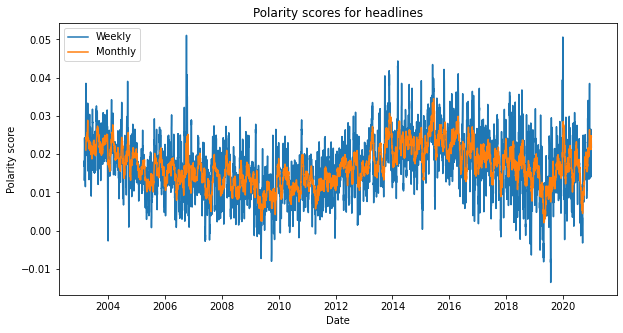

In [84]:
plt.figure(figsize=(10, 5))

plt.plot(week['date'], week['score'], label = 'Weekly')
plt.plot(month['date'], month['score'], label = 'Monthly')

plt.title('Polarity scores for headlines')
plt.xlabel('Date')
plt.ylabel('Polarity score')
plt.legend()

#
plt.show()

## Summary

### General trends

Looking at the graph, we can see that most headlines exists in the positive space on the graph. This could mean that the headlines generally express a somewhat positive sentiment.

### Inferences

Naturally, the "lows" of the graph are initially most interesting. We can see a drop from around 2008 to 2012, and one could look into whether this correlates to the financial crisis during that period. This would require a more qualitative look at the words used in the headlines. This is also the case around 2019 (starting in 2016) and similarly an analysis of the words used could show what this drop is all about. My only guess would be that it is correlated to the election of former American President Donald Trump.